In [277]:
import pandas as pd
import numpy as np
import datetime
import json
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas
import plotly.offline as pyo
import plotly.express as px

In [278]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")

In [279]:
melhouse = pd.read_csv('melb_data.csv')
melhouse.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [280]:
melhouse.shape

(13580, 21)

In [281]:
melhouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [282]:
melhouse.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [283]:
df_melhouse = melhouse.copy()

In [284]:
df_melhouse.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Data Preprocession
(Drop off unessential columns--Method, SellerG, Distance, Propertycount)

In [285]:
df_melhouse.drop(['Method','SellerG','Distance','Propertycount'],axis=1,inplace=True)

In [286]:
df_melhouse.shape

(13580, 17)

Property Distrbution

In [287]:
porperty_count = df_melhouse[['Suburb','Type']]
porperty_count = porperty_count.groupby('Suburb').count().reset_index()

porperty_count.head()

,Suburb,Type
0,Abbotsford,56
1,Aberfeldie,44
2,Airport West,67
3,Albanvale,6
4,Albert Park,69


In [288]:
porperty_count = porperty_count.nlargest(20, 'Type')

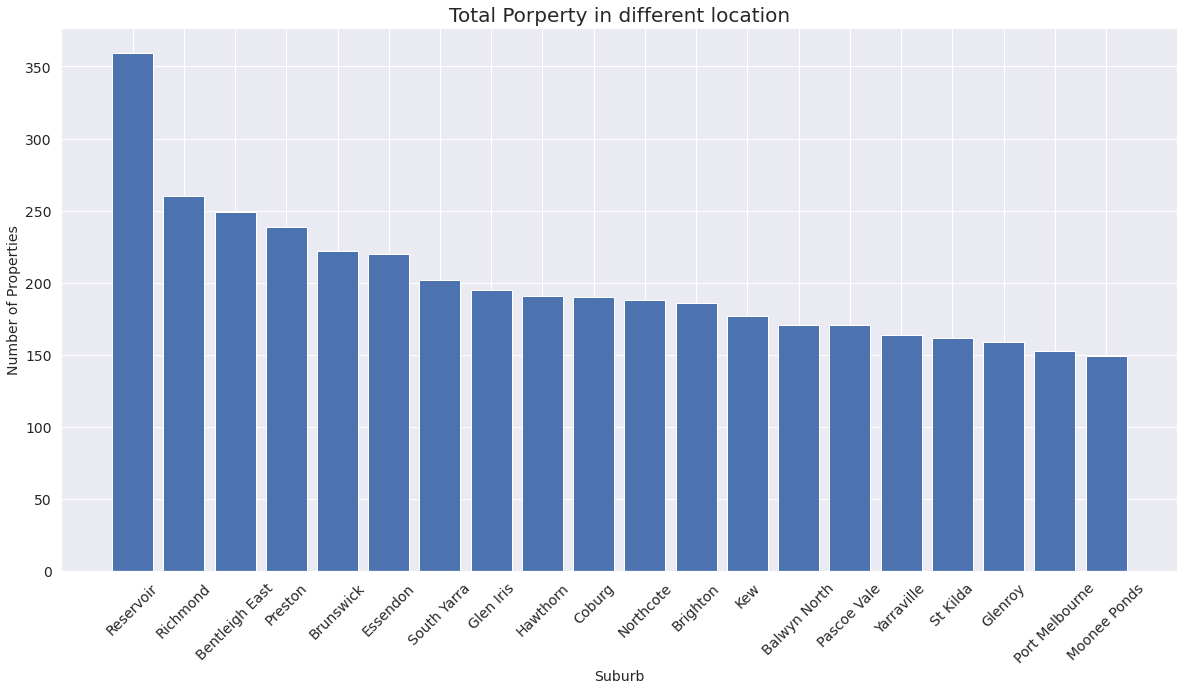

In [289]:
plt.figure(figsize=(20,10))
plt.bar(porperty_count.Suburb,porperty_count.Type,color='b')
plt.title('Total Porperty in different location', fontsize=20)
plt.xlabel('Suburb', fontsize=14)
plt.ylabel('Number of Properties', fontsize=14)
plt.tick_params(labelsize=14)
plt.xticks(rotation=45)
# for a,b in zip(count_by_location.index, count_by_location.values):
#     plt.text(a, b+5, b, fontsize=10, ha='center')
plt.show()

Different Type of Property Average Price by Suburb

In [290]:
melhouse_house = df_melhouse.drop(df_melhouse[df_melhouse['Type']!='h'].index)
house = melhouse_house[['Suburb','Price']]
house_mean = house.groupby('Suburb')['Price'].agg(['mean']).apply(lambda x:x/1000000).round(2).reset_index()
house_mean = house_mean.sort_values(by = ['mean'])
house_mean_topk = house_mean.nlargest(20, 'mean')

melhouse_unit = df_melhouse.drop(melhouse[melhouse['Type']!='u'].index)
unit = melhouse_unit[['Suburb','Price']]
unit_mean = unit.groupby('Suburb')['Price'].agg(['mean']).apply(lambda x:x/1000000).round(2).reset_index()
unit_mean = unit_mean.sort_values(by = ['mean'])
unit_mean_topk = unit_mean.nlargest(20, 'mean')

melhouse_townhouse = df_melhouse.drop(melhouse[melhouse['Type']!='t'].index)
townhouse = melhouse_townhouse[['Suburb','Price']]
townhouse_mean = townhouse.groupby('Suburb')['Price'].agg(['mean']).apply(lambda x:x/1000000).round(2).reset_index()
townhouse_mean = townhouse_mean.sort_values(by = ['mean'])
townhouse_mean_topk = townhouse_mean.nlargest(20, 'mean')

<AxesSubplot:title={'center':'Townhouse Price in different location'}, xlabel='Suburb', ylabel='mean'>

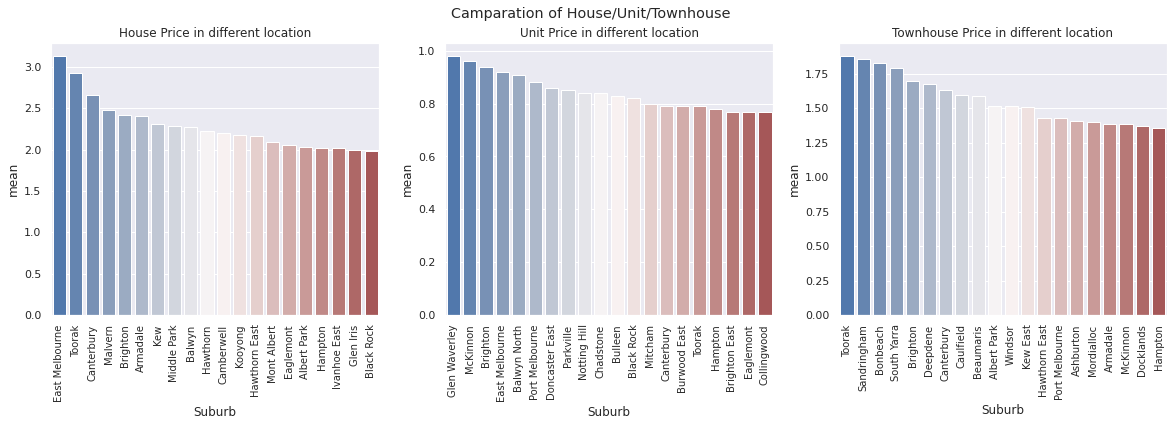

In [291]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle('Camparation of House/Unit/Townhouse')

ax0 = axs[0]
ax0.set_xticklabels(house_mean_topk['Suburb'],rotation = 90,fontsize = 'small')
ax0.set_title('House Price in different location')
ax0.get_yaxis().get_major_formatter().set_scientific(False)
ax1 = axs[1]
ax1.set_xticklabels(unit_mean_topk['Suburb'],rotation = 90,fontsize = 'small')
ax1.get_yaxis().get_major_formatter().set_scientific(False)
ax1.set_title('Unit Price in different location')
ax2 = axs[2]
ax2.set_xticklabels(townhouse_mean_topk['Suburb'],rotation = 90,fontsize = 'small')
ax2.get_yaxis().get_major_formatter().set_scientific(False)
ax2.set_title('Townhouse Price in different location')
     
sns.barplot(x="Suburb", y="mean", data=house_mean_topk, palette="vlag", ax = ax0)
sns.barplot(x="Suburb", y="mean", data=unit_mean_topk, palette="vlag", ax = ax1)
sns.barplot(x="Suburb", y="mean", data=townhouse_mean_topk, palette="vlag", ax = ax2)

Heat Map

In [292]:
mel_region = geopandas.read_file("melbourne.geojson")
mel_region.rename(columns={'name':'Suburb'}, inplace = True)
mel_region.head()

,Suburb,cartodb_id,created_at,updated_at,geometry
0,Cremorne,31,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.98905 -37.82341, 144.98793 -37.82962, 144.98961 -37.83119, 144.99114 -37.83305, 144.99435 -37.83360, 144.99659 -37.83429, 144.99673 -37.83246, 144.99777 -37.82661, 144.99615 -37.82639, 144.99611 -37.82661, 144.99435 -37.82630, 144.99301 -37.82547, 144.99162 -37.82433, 144.98965 -37.82358, 144.98905 -37.82341)))"
1,Caulfield,56,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((145.01631 -37.87916, 145.01495 -37.88603, 145.02879 -37.88777, 145.03766 -37.88888, 145.03798 -37.88719, 145.03817 -37.88622, 145.03814 -37.88617, 145.03460 -37.88139, 145.01631 -37.87916)))"
2,Carnegie,58,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((145.04613 -37.88727, 145.04495 -37.88935, 145.04478 -37.88965, 145.04610 -37.89339, 145.04515 -37.89820, 145.04469 -37.90051, 145.04469 -37.90052, 145.04470 -37.90052, 145.04632 -37.90071, 145.04713 -37.90081, 145.05469 -37.90173, 145.05392 -37.90571, 145.05737 -37.90613, 145.06035 -37.90650, 145.06101 -37.90253, 145.06405 -37.90291, 145.06746 -37.88465, 145.06285 -37.88467, 145.05250 -37.88305, 145.05117 -37.88243, 145.05015 -37.88164, 145.04964 -37.88103, 145.04613 -37.88727)))"
3,Kingsville,107,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.88543 -37.80259, 144.87400 -37.80865, 144.87013 -37.81094, 144.86923 -37.81120, 144.87087 -37.81139, 144.87406 -37.81174, 144.88347 -37.81282, 144.88409 -37.80957, 144.88543 -37.80259)))"
4,South Kingsville,111,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.86553 -37.83306, 144.86566 -37.83307, 144.88175 -37.83481, 144.88049 -37.83410, 144.87834 -37.83256, 144.87710 -37.83147, 144.86762 -37.82464, 144.86741 -37.82449, 144.86692 -37.82423, 144.86553 -37.83306)))"


In [293]:
price_map = pd.DataFrame(melhouse, columns = ['Suburb','Type','Price','Rooms','Landsize'])
price_map.head()

,Suburb,Type,Price,Rooms,Landsize
0,Abbotsford,h,1480000.0,2,202.0
1,Abbotsford,h,1035000.0,2,156.0
2,Abbotsford,h,1465000.0,3,134.0
3,Abbotsford,h,850000.0,3,94.0
4,Abbotsford,h,1600000.0,4,120.0


In [294]:
df_gis = mel_region.merge(price_map,on='Suburb', how='left')
df_gis.head()

,Suburb,cartodb_id,created_at,updated_at,geometry,Type,Price,Rooms,Landsize
0,Cremorne,31,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.98905 -37.82341, 144.98793 -37.82962, 144.98961 -37.83119, 144.99114 -37.83305, 144.99435 -37.83360, 144.99659 -37.83429, 144.99673 -37.83246, 144.99777 -37.82661, 144.99615 -37.82639, 144.99611 -37.82661, 144.99435 -37.82630, 144.99301 -37.82547, 144.99162 -37.82433, 144.98965 -37.82358, 144.98905 -37.82341)))",h,1000000.0,2.0,176.0
1,Cremorne,31,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.98905 -37.82341, 144.98793 -37.82962, 144.98961 -37.83119, 144.99114 -37.83305, 144.99435 -37.83360, 144.99659 -37.83429, 144.99673 -37.83246, 144.99777 -37.82661, 144.99615 -37.82639, 144.99611 -37.82661, 144.99435 -37.82630, 144.99301 -37.82547, 144.99162 -37.82433, 144.98965 -37.82358, 144.98905 -37.82341)))",h,725000.0,2.0,115.0
2,Cremorne,31,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.98905 -37.82341, 144.98793 -37.82962, 144.98961 -37.83119, 144.99114 -37.83305, 144.99435 -37.83360, 144.99659 -37.83429, 144.99673 -37.83246, 144.99777 -37.82661, 144.99615 -37.82639, 144.99611 -37.82661, 144.99435 -37.82630, 144.99301 -37.82547, 144.99162 -37.82433, 144.98965 -37.82358, 144.98905 -37.82341)))",u,425000.0,1.0,0.0
3,Cremorne,31,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.98905 -37.82341, 144.98793 -37.82962, 144.98961 -37.83119, 144.99114 -37.83305, 144.99435 -37.83360, 144.99659 -37.83429, 144.99673 -37.83246, 144.99777 -37.82661, 144.99615 -37.82639, 144.99611 -37.82661, 144.99435 -37.82630, 144.99301 -37.82547, 144.99162 -37.82433, 144.98965 -37.82358, 144.98905 -37.82341)))",h,1280000.0,3.0,324.0
4,Cremorne,31,2015-03-10T04:37:29+00:00,2015-03-10T04:37:29+00:00,"MULTIPOLYGON (((144.98905 -37.82341, 144.98793 -37.82962, 144.98961 -37.83119, 144.99114 -37.83305, 144.99435 -37.83360, 144.99659 -37.83429, 144.99673 -37.83246, 144.99777 -37.82661, 144.99615 -37.82639, 144.99611 -37.82661, 144.99435 -37.82630, 144.99301 -37.82547, 144.99162 -37.82433, 144.98965 -37.82358, 144.98905 -37.82341)))",h,1000000.0,2.0,146.0


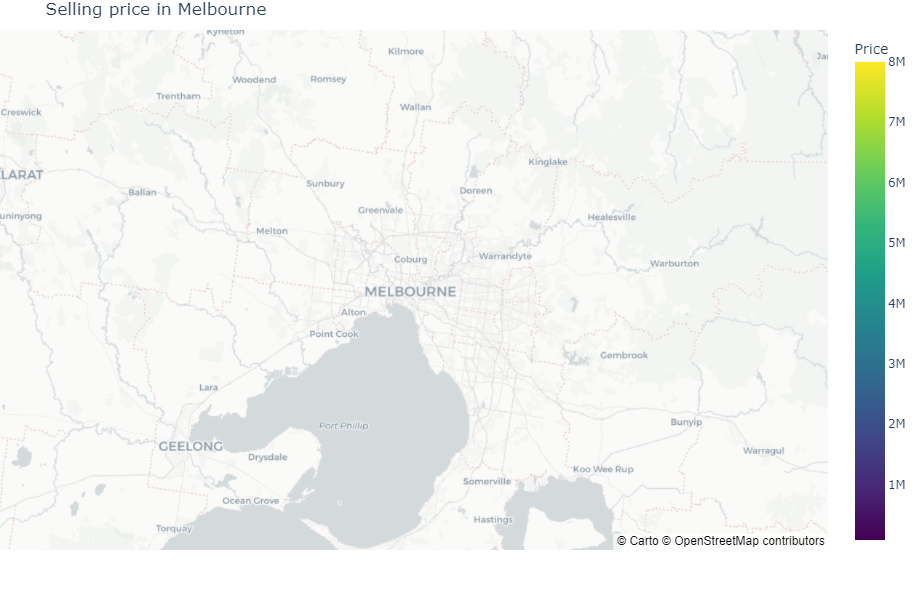

In [296]:
fig= px.choropleth_mapbox(
                    data_frame=df_gis,
                    geojson=mel_region,
                    color='Price',
                    locations='Suburb', 
                    featureidkey='properties.cartodb_id',
                    mapbox_style="carto-positron",
                    color_continuous_scale='viridis',
                    center={"lat": -37.81110, "lon": 144.97150},
                    hover_data={'Suburb','Type','Price','Rooms','Landsize'},
                    opacity=0.7,
                    zoom=8,
                    title=' Selling price in Melbourne',#map title
)
fig.update_layout(margin=dict(
    l=0,
    r=0,
    b=50,
    t=30,
),height=600,width=900)
    
fig.show()
   